<a href="https://colab.research.google.com/github/nikhil2020/Housing_Rent/blob/master/Rent_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

#from statsmodels.tools.eval_measures import rmse

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder


# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
pwd

'/content'

In [4]:
ls

drive/  sample_data/


##### To change the directory

In [5]:
import os
os.chdir('/content/drive/My Drive/Datasets/UpWork')

# Importing dataset and Data Preparation

##### Importing the address_data dataset

In [6]:
address = pd.read_excel('address_data.xlsx')

In [7]:
address.head()

,id,latitude,longitude,zip_code,is_checked
0,4,61.49855,23.78102,33500,1
1,5,61.47266,23.72352,33900,1
2,6,61.47148,23.75847,33900,1
3,7,61.45248,23.84164,33720,1
4,8,61.49996,23.74870,33210,1


In [8]:
address.columns

Index(['id', 'latitude', 'longitude', 'zip_code', 'is_checked'], dtype='object')

In [9]:
address.shape

(133112, 5)

##### Importing the history_rental_df dataset

In [10]:
rental = pd.read_csv("history_rental_df.csv",index_col=None)

In [11]:
rental.head()

,Unnamed: 0,id,address,unique_address_id,link,size,buildingType,layout,standardized_layout,rent,elevator,siteOwner,rent_out_time,totalFloors,totalApartments,buildingMaterial,heating,heatingSource,removed_timestamp,added_timestamp,buildingYear,property_id,r_model_check,history_added_timestamp,ffqc
0,0,1,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,75,Kerrostalo,"3h,k,s",3.0,985,On,Oma,27,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,10/3/2019,9/6/2019,1995.0,8.372070e+13,1.0,NaN,11110000.0
1,1,2,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,41.5,Kerrostalo,"1h, tpk, s",1.0,600,On,Oma,5,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,5/7/2019,5/2/2019,1995.0,8.372070e+13,1.0,NaN,111110000.0
2,2,3,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,75,Kerrostalo,"3h, k, s",3.0,942,On,Oma,22,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,10/31/2017,10/9/2017,1995.0,8.372070e+13,1.0,NaN,11110000.0
3,3,4,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,75,Kerrostalo,"3h, k, s",3.0,942,On,Oma,13,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,11/13/2017,10/31/2017,1995.0,8.372070e+13,1.0,NaN,11110000.0
4,4,5,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,51,Kerrostalo,"2h, kk, s",2.0,692,On,Oma,23,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,11/23/2017,10/31/2017,1995.0,8.372070e+13,1.0,NaN,11110000.0


##### Data is only valid when r_model_check = 1 

In [12]:
rental = rental[rental['r_model_check'] == 1]

In [13]:
rental.id.dtypes

dtype('O')

##### As the id in the house_rental data is object type so convert it into numeric data type

In [14]:
rental['id'] = pd.to_numeric(rental.id)

## Master Dataset

##### Merging the two data i.e history_rental_data and address to build the master dataset

In [15]:
df  = pd.merge(rental, address, on='id')

In [16]:
df.head()

,Unnamed: 0,id,address,unique_address_id,link,size,buildingType,layout,standardized_layout,rent,elevator,siteOwner,rent_out_time,totalFloors,totalApartments,buildingMaterial,heating,heatingSource,removed_timestamp,added_timestamp,buildingYear,property_id,r_model_check,history_added_timestamp,ffqc,latitude,longitude,zip_code,is_checked
0,3,4,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,75,Kerrostalo,"3h, k, s",3.0,942,On,Oma,13,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,11/13/2017,10/31/2017,1995.0,8.372070e+13,1.0,NaN,11110000.0,61.49855,23.78102,33500,1
1,4,5,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,51,Kerrostalo,"2h, kk, s",2.0,692,On,Oma,23,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,11/23/2017,10/31/2017,1995.0,8.372070e+13,1.0,NaN,11110000.0,61.47266,23.72352,33900,1
2,5,6,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,57,Kerrostalo,"2h, k, s",2.0,764,On,Oma,5,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,3/1/2018,2/24/2018,1995.0,8.372070e+13,1.0,NaN,111110000.0,61.47148,23.75847,33900,1
3,6,7,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,51,Kerrostalo,"2h, kk, s",2.0,692,On,Oma,8,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,8/22/2018,8/14/2018,1995.0,8.372070e+13,1.0,NaN,111110000.0,61.45248,23.84164,33720,1
4,7,8,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,57,Kerrostalo,"2h, k, s",2.0,749,On,Oma,12,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,10/22/2018,10/10/2018,1995.0,8.372070e+13,1.0,NaN,111110000.0,61.49996,23.74870,33210,1


In [17]:
df.shape

(125347, 29)

In [18]:
df.columns

Index(['Unnamed: 0', 'id', 'address', 'unique_address_id', 'link', 'size',
       'buildingType', 'layout', 'standardized_layout', 'rent', 'elevator',
       'siteOwner', 'rent_out_time', 'totalFloors', 'totalApartments',
       'buildingMaterial', 'heating', 'heatingSource', 'removed_timestamp',
       'added_timestamp', 'buildingYear', 'property_id', 'r_model_check',
       'history_added_timestamp', 'ffqc', 'latitude', 'longitude', 'zip_code',
       'is_checked'],
      dtype='object')

##### info gives the information of the dtypes, null values and shape of the dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125347 entries, 0 to 125346
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               125347 non-null  int64  
 1   id                       125347 non-null  int64  
 2   address                  125347 non-null  object 
 3   unique_address_id        125347 non-null  float64
 4   link                     125347 non-null  object 
 5   size                     125347 non-null  object 
 6   buildingType             125347 non-null  object 
 7   layout                   125347 non-null  object 
 8   standardized_layout      122181 non-null  float64
 9   rent                     125347 non-null  object 
 10  elevator                 125347 non-null  object 
 11  siteOwner                118022 non-null  object 
 12  rent_out_time            110938 non-null  object 
 13  totalFloors              125347 non-null  object 
 14  tota

##### describe gives tells us that the distribution of the data.

In [20]:
df.describe()

,Unnamed: 0,id,unique_address_id,standardized_layout,totalApartments,buildingYear,property_id,r_model_check,ffqc,latitude,longitude,is_checked
count,125347.000000,125347.000000,125347.000000,122181.000000,120998.000000,120270.000000,1.138340e+05,125347.0,7.663800e+04,125347.000000,125347.000000,125347.000000
mean,70453.300143,70441.382299,7509.013475,1.825660,55.747674,1966.932427,3.741848e+13,1.0,9.086166e+07,61.119925,23.634571,0.201481
std,38669.456137,38657.909168,2926.063628,0.828695,36.533905,29.648212,3.655868e+13,0.0,4.018237e+07,2.166670,2.579583,0.401108
min,3.000000,4.000000,4.000000,1.000000,1.000000,1848.000000,2.000100e+12,1.0,1.101000e+07,-35.406130,-99.167830,0.000000
25%,37031.500000,37029.500000,6760.000000,1.000000,32.000000,1947.000000,9.101410e+12,1.0,1.111000e+08,60.257130,22.340785,0.000000
50%,70536.000000,70528.000000,8052.000000,2.000000,48.000000,1963.000000,9.104300e+12,1.0,1.111100e+08,60.601980,23.798480,0.000000
75%,103966.500000,103942.500000,9493.000000,2.000000,72.000000,1992.000000,8.373010e+13,1.0,1.111100e+08,61.627155,24.923725,0.000000
max,137429.000000,137397.000000,11568.000000,7.000000,304.000000,2019.000000,9.050400e+13,1.0,1.111100e+08,68.668970,153.064940,1.000000


## Data Preparation And  Data Understanding

In [21]:
df.head()

,Unnamed: 0,id,address,unique_address_id,link,size,buildingType,layout,standardized_layout,rent,elevator,siteOwner,rent_out_time,totalFloors,totalApartments,buildingMaterial,heating,heatingSource,removed_timestamp,added_timestamp,buildingYear,property_id,r_model_check,history_added_timestamp,ffqc,latitude,longitude,zip_code,is_checked
0,3,4,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,75,Kerrostalo,"3h, k, s",3.0,942,On,Oma,13,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,11/13/2017,10/31/2017,1995.0,8.372070e+13,1.0,NaN,11110000.0,61.49855,23.78102,33500,1
1,4,5,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,51,Kerrostalo,"2h, kk, s",2.0,692,On,Oma,23,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,11/23/2017,10/31/2017,1995.0,8.372070e+13,1.0,NaN,11110000.0,61.47266,23.72352,33900,1
2,5,6,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,57,Kerrostalo,"2h, k, s",2.0,764,On,Oma,5,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,3/1/2018,2/24/2018,1995.0,8.372070e+13,1.0,NaN,111110000.0,61.47148,23.75847,33900,1
3,6,7,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,51,Kerrostalo,"2h, kk, s",2.0,692,On,Oma,8,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,8/22/2018,8/14/2018,1995.0,8.372070e+13,1.0,NaN,111110000.0,61.45248,23.84164,33720,1
4,7,8,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,57,Kerrostalo,"2h, k, s",2.0,749,On,Oma,12,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,10/22/2018,10/10/2018,1995.0,8.372070e+13,1.0,NaN,111110000.0,61.49996,23.74870,33210,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125347 entries, 0 to 125346
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               125347 non-null  int64  
 1   id                       125347 non-null  int64  
 2   address                  125347 non-null  object 
 3   unique_address_id        125347 non-null  float64
 4   link                     125347 non-null  object 
 5   size                     125347 non-null  object 
 6   buildingType             125347 non-null  object 
 7   layout                   125347 non-null  object 
 8   standardized_layout      122181 non-null  float64
 9   rent                     125347 non-null  object 
 10  elevator                 125347 non-null  object 
 11  siteOwner                118022 non-null  object 
 12  rent_out_time            110938 non-null  object 
 13  totalFloors              125347 non-null  object 
 14  tota

##### Rename the size as h_size as because size is function in python

In [23]:
df.rename(columns={"size":"h_size"},inplace =True)

In [24]:
df.columns

Index(['Unnamed: 0', 'id', 'address', 'unique_address_id', 'link', 'h_size',
       'buildingType', 'layout', 'standardized_layout', 'rent', 'elevator',
       'siteOwner', 'rent_out_time', 'totalFloors', 'totalApartments',
       'buildingMaterial', 'heating', 'heatingSource', 'removed_timestamp',
       'added_timestamp', 'buildingYear', 'property_id', 'r_model_check',
       'history_added_timestamp', 'ffqc', 'latitude', 'longitude', 'zip_code',
       'is_checked'],
      dtype='object')

In [25]:
df.h_size.str.isnumeric().isnull().sum()

27223

In [26]:
df.unique_address_id.value_counts().head()

1115.0     351
8918.0     314
11227.0    303
788.0      302
3080.0     283
Name: unique_address_id, dtype: int64

In [27]:
df.standardized_layout.value_counts().head()

2.0    52373
1.0    48231
3.0    16977
4.0     3957
5.0      546
Name: standardized_layout, dtype: int64

In [28]:
df[['address', 'unique_address_id']].head(10)

,address,unique_address_id
0,Aapelinraitti 7 Tampere,288.0
1,Aapelinraitti 7 Tampere,288.0
2,Aapelinraitti 7 Tampere,288.0
3,Aapelinraitti 7 Tampere,288.0
4,Aapelinraitti 7 Tampere,288.0
5,Aapelinraitti 7 Tampere,288.0
6,Aapelinraitti 7 Tampere,288.0
7,Aapelinraitti 7 Tampere,288.0
8,Aapelinraitti 7 Tampere,288.0
9,Aapelinraitti 7 Tampere,288.0


In [29]:
df.address.nunique()

4177

In [30]:
df.unique_address_id.nunique()

4177

In [31]:
df.elevator.value_counts()

On             84563
Ei tiedossa    36861
Ei hissiä       3923
Name: elevator, dtype: int64

In [32]:
df.siteOwner.value_counts()

Oma          90701
Vuokralla    27321
Name: siteOwner, dtype: int64

In [33]:
df.rent_out_time.value_counts()

1       6029
4       5673
3       5623
6       5599
5       5353
        ... 
445        1
459        1
461        1
421        1
1214       1
Name: rent_out_time, Length: 548, dtype: int64

In [34]:
df.heating.value_counts().head()

Vesikeskuslämmitys     122338
Suora sähkölämmitys       692
Uunilämmitys              379
Ilmakeskuslämmitys        226
Name: heating, dtype: int64

In [35]:
df.heatingSource.value_counts().head()

Kauko- tai aluelämpö    114459
Kevyt polttoöljy          5052
Raskas polttoöljy         1929
Sähkö                      903
Maalämpö tms.              767
Name: heatingSource, dtype: int64

In [36]:
df.buildingYear.value_counts()

1962.0    4477
1961.0    4246
1963.0    3735
1928.0    3384
1960.0    2886
          ... 
1921.0      26
1899.0      21
1897.0      20
1865.0      14
1880.0       7
Name: buildingYear, Length: 129, dtype: int64

##### Dropping the rows with all null values in the row

In [37]:
df = df.dropna(how='all',axis =0)

In [38]:
for i in df[df.totalFloors == 'Ei tiedossa'].index:
    df.drop([i],inplace = True)

##### Converting the object dtypes into numeric

In [39]:
df['totalFloors'] = pd.to_numeric(df.totalFloors)

In [40]:
df['h_size'] = pd.to_numeric(df.h_size)

In [41]:
df['rent_out_time'] = pd.to_numeric(df.rent_out_time)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120946 entries, 0 to 125346
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               120946 non-null  int64  
 1   id                       120946 non-null  int64  
 2   address                  120946 non-null  object 
 3   unique_address_id        120946 non-null  float64
 4   link                     120946 non-null  object 
 5   h_size                   120946 non-null  float64
 6   buildingType             120946 non-null  object 
 7   layout                   120946 non-null  object 
 8   standardized_layout      117828 non-null  float64
 9   rent                     120946 non-null  object 
 10  elevator                 120946 non-null  object 
 11  siteOwner                115197 non-null  object 
 12  rent_out_time            106880 non-null  float64
 13  totalFloors              120946 non-null  int64  
 14  tota

In [43]:
df.rent.dropna(axis = 0,inplace=True)

In [44]:
df['rent'] = pd.to_numeric(df.rent)

In [45]:
df.head()

,Unnamed: 0,id,address,unique_address_id,link,h_size,buildingType,layout,standardized_layout,rent,elevator,siteOwner,rent_out_time,totalFloors,totalApartments,buildingMaterial,heating,heatingSource,removed_timestamp,added_timestamp,buildingYear,property_id,r_model_check,history_added_timestamp,ffqc,latitude,longitude,zip_code,is_checked
0,3,4,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,75.0,Kerrostalo,"3h, k, s",3.0,942,On,Oma,13.0,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,11/13/2017,10/31/2017,1995.0,8.372070e+13,1.0,NaN,11110000.0,61.49855,23.78102,33500,1
1,4,5,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,51.0,Kerrostalo,"2h, kk, s",2.0,692,On,Oma,23.0,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,11/23/2017,10/31/2017,1995.0,8.372070e+13,1.0,NaN,11110000.0,61.47266,23.72352,33900,1
2,5,6,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,57.0,Kerrostalo,"2h, k, s",2.0,764,On,Oma,5.0,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,3/1/2018,2/24/2018,1995.0,8.372070e+13,1.0,NaN,111110000.0,61.47148,23.75847,33900,1
3,6,7,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,51.0,Kerrostalo,"2h, kk, s",2.0,692,On,Oma,8.0,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,8/22/2018,8/14/2018,1995.0,8.372070e+13,1.0,NaN,111110000.0,61.45248,23.84164,33720,1
4,7,8,Aapelinraitti 7 Tampere,288.0,https://asunnot.oikotie.fi/talo/aapelinraitti-...,57.0,Kerrostalo,"2h, k, s",2.0,749,On,Oma,12.0,6,27.0,Betoni,Vesikeskuslämmitys,Kauko- tai aluelämpö,10/22/2018,10/10/2018,1995.0,8.372070e+13,1.0,NaN,111110000.0,61.49996,23.74870,33210,1


In [46]:
df.buildingType.value_counts()

Kerrostalo    118684
Rivitalo        1574
Luhtitalo        688
Name: buildingType, dtype: int64

In [47]:
df.columns

Index(['Unnamed: 0', 'id', 'address', 'unique_address_id', 'link', 'h_size',
       'buildingType', 'layout', 'standardized_layout', 'rent', 'elevator',
       'siteOwner', 'rent_out_time', 'totalFloors', 'totalApartments',
       'buildingMaterial', 'heating', 'heatingSource', 'removed_timestamp',
       'added_timestamp', 'buildingYear', 'property_id', 'r_model_check',
       'history_added_timestamp', 'ffqc', 'latitude', 'longitude', 'zip_code',
       'is_checked'],
      dtype='object')

In [48]:
X = df[['unique_address_id', 'h_size', 'buildingType', 'standardized_layout',  'elevator', 'siteOwner',
       'rent_out_time', 'totalFloors', 'totalApartments', 'buildingMaterial',
       'heating', 'heatingSource', 'latitude', 'longitude',
       'buildingYear',]]
y = df[['rent']]

# Checking for Null Values

In [49]:
X.isnull().sum()

unique_address_id          0
h_size                     0
buildingType               0
standardized_layout     3118
elevator                   0
siteOwner               5749
rent_out_time          14066
totalFloors                0
totalApartments            0
buildingMaterial         359
heating                  191
heatingSource            278
latitude                   0
longitude                  0
buildingYear             728
dtype: int64

In [50]:
X.shape

(120946, 15)

In [51]:
y.shape

(120946, 1)

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120946 entries, 0 to 125346
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   unique_address_id    120946 non-null  float64
 1   h_size               120946 non-null  float64
 2   buildingType         120946 non-null  object 
 3   standardized_layout  117828 non-null  float64
 4   elevator             120946 non-null  object 
 5   siteOwner            115197 non-null  object 
 6   rent_out_time        106880 non-null  float64
 7   totalFloors          120946 non-null  int64  
 8   totalApartments      120946 non-null  float64
 9   buildingMaterial     120587 non-null  object 
 10  heating              120755 non-null  object 
 11  heatingSource        120668 non-null  object 
 12  latitude             120946 non-null  float64
 13  longitude            120946 non-null  float64
 14  buildingYear         120218 non-null  float64
dtypes: float64(8), in

In [53]:
X.standardized_layout.value_counts()

2.0    50396
1.0    46809
3.0    16181
4.0     3816
5.0      532
6.0       81
7.0       13
Name: standardized_layout, dtype: int64

In [54]:
X.isnull().sum()

unique_address_id          0
h_size                     0
buildingType               0
standardized_layout     3118
elevator                   0
siteOwner               5749
rent_out_time          14066
totalFloors                0
totalApartments            0
buildingMaterial         359
heating                  191
heatingSource            278
latitude                   0
longitude                  0
buildingYear             728
dtype: int64

#####  buildingType column understanding with other features

In [55]:
# use of grouping
groups = X.groupby('buildingType')

In [56]:
# use sum(), min(), max(), count()
groups.mean()

,unique_address_id,h_size,standardized_layout,rent_out_time,totalFloors,totalApartments,latitude,longitude,buildingYear
buildingType,,,,,,,,,
Kerrostalo,7498.569706,46.946714,1.810784,27.542518,5.633784,56.628198,61.121377,23.634556,1966.430618
Luhtitalo,4775.625000,46.962355,1.756798,28.071763,2.716570,19.534884,60.674296,24.396348,2005.510174
Rivitalo,7533.465057,71.008513,2.663866,35.794944,1.668361,5.966328,61.245932,23.510944,1987.143583


In [57]:
groups.agg(['mean', 'min', 'max', 'count'])

unique_address_id                  ... buildingYear                
                          mean    min      max  ...          min     max   count
buildingType                                    ...                             
Kerrostalo         7498.569706    4.0  11568.0  ...       1848.0  2019.0  117956
Luhtitalo          4775.625000  199.0  11508.0  ...       1975.0  2018.0     688
Rivitalo           7533.465057   81.0  11561.0  ...       1886.0  2017.0    1574

[3 rows x 36 columns]

##### standardized_layout feature

In [58]:
X.standardized_layout.value_counts()

2.0    50396
1.0    46809
3.0    16181
4.0     3816
5.0      532
6.0       81
7.0       13
Name: standardized_layout, dtype: int64

In [59]:
X.standardized_layout.mean()

1.8216807549988119

In [60]:
X.standardized_layout.median()

2.0

In [61]:
X.standardized_layout.mode()

0    2.0
dtype: float64

In [62]:
# Replacing the null values i.e NaN with 2.0 
X.standardized_layout.fillna(2.0,inplace = True)

##### Rent_out_time feature understanding to replace the null values

In [63]:
X.rent_out_time.value_counts().head()

1.0    5778
4.0    5516
3.0    5475
6.0    5430
5.0    5195
Name: rent_out_time, dtype: int64

In [64]:
X.rent_out_time.mean()

27.655641841317365

In [65]:
X.rent_out_time.median()

12.0

In [66]:
X.rent_out_time.mode()

0    1.0
dtype: float64

In [67]:
X.rent_out_time.fillna(12.0,inplace = True)

##### SiteOwner feature understanding 

In [68]:
groups = X.groupby('siteOwner')

In [69]:
groups.mean()

,unique_address_id,h_size,standardized_layout,rent_out_time,totalFloors,totalApartments,latitude,longitude,buildingYear
siteOwner,,,,,,,,,
Oma,7777.577894,46.218013,1.767696,24.521872,5.745734,58.068538,61.192506,23.582201,1961.913759
Vuokralla,6528.396292,50.972154,2.016586,31.118094,5.027944,49.811802,60.856324,23.832426,1984.573495


In [70]:
groups.agg(['mean', 'min', 'max', 'count'])

unique_address_id                ... buildingYear               
                       mean  min      max  ...          min     max  count
siteOwner                                  ...                            
Oma             7777.577894  4.0  11561.0  ...       1848.0  2019.0  88114
Vuokralla       6528.396292  6.0  11551.0  ...       1922.0  2019.0  26553

[2 rows x 36 columns]

In [71]:
X.siteOwner.fillna('Vuokralla',inplace=True)

##### totalApartments feature understanding to replace the null values

In [72]:
X.totalApartments.value_counts().head()

48.0    3451
24.0    3339
36.0    3320
30.0    2692
32.0    2539
Name: totalApartments, dtype: int64

In [73]:
X.totalApartments.mean()

55.75787541547467

In [74]:
X.totalApartments.median()

48.0

In [75]:
X.totalApartments.fillna(48.0,inplace = True)

##### buidingMaterial feature understanding to replace the null values 

In [76]:
X.buildingMaterial.value_counts()

Betoni         87061
Tiili          30100
Puu             2615
Ei tiedossa      659
Teräs            152
Name: buildingMaterial, dtype: int64

In [77]:
groups = X.groupby('buildingMaterial')

In [78]:
groups.mean()

,unique_address_id,h_size,standardized_layout,rent_out_time,totalFloors,totalApartments,latitude,longitude,buildingYear
buildingMaterial,,,,,,,,,
Betoni,7272.790492,49.057706,1.913532,27.136938,5.768576,55.673459,61.118923,23.632406,1978.175379
Ei tiedossa,7399.047041,49.950683,2.077390,37.165402,3.570561,24.993930,60.763559,24.081462,1977.054628
Puu,7152.305545,54.179006,2.043595,24.889866,1.708222,19.379350,60.983328,23.577626,1957.594459
Teräs,8914.519737,57.924342,1.914474,24.078947,4.960526,77.250000,61.709244,23.676769,1988.296053
Tiili,8110.004086,41.270658,1.545648,21.937807,5.366910,59.656047,61.131204,23.658374,1935.175620


In [79]:
groups.agg(['mean', 'min', 'max', 'count'])

unique_address_id                   ... buildingYear               
                              mean     min      max  ...          min     max  count
buildingMaterial                                     ...                            
Betoni                 7272.790492     7.0  11568.0  ...       1848.0  2019.0  86350
Ei tiedossa            7399.047041  1056.0  11040.0  ...       1927.0  2017.0    659
Puu                    7152.305545    59.0  11561.0  ...       1877.0  2018.0   2599
Teräs                  8914.519737  4686.0  10855.0  ...       1912.0  1997.0    152
Tiili                  8110.004086     4.0  11547.0  ...       1865.0  1990.0  30099

[5 rows x 36 columns]

In [80]:
# Replacing the null values with Tiili 
X.buildingMaterial.fillna('Tiili',inplace = True)

##### heating feature understanding and replacing the null values

In [81]:
X.heating.value_counts()

Vesikeskuslämmitys     119478
Suora sähkölämmitys       674
Uunilämmitys              377
Ilmakeskuslämmitys        226
Name: heating, dtype: int64

In [82]:
groups = X.groupby('heating')

In [83]:
groups.mean()

,unique_address_id,h_size,standardized_layout,rent_out_time,totalFloors,totalApartments,latitude,longitude,buildingYear
heating,,,,,,,,,
Ilmakeskuslämmitys,9380.557522,57.712832,2.004425,29.721239,6.101770,63.637168,62.782767,22.763843,1979.929204
Suora sähkölämmitys,6564.275964,45.122552,1.765579,25.077151,2.471810,24.973294,61.076391,23.662853,1951.026826
Uunilämmitys,9177.546419,38.842175,1.442971,14.007958,2.381963,31.442971,61.266003,23.036868,1902.591512
Vesikeskuslämmitys,7485.171680,47.273281,1.827751,25.877534,5.589154,55.954653,61.116691,23.641135,1967.222462


In [84]:
groups.agg(['mean', 'min', 'max', 'count'])

unique_address_id                   ... buildingYear                
                                 mean     min      max  ...          min     max   count
heating                                                 ...                             
Ilmakeskuslämmitys        9380.557522  3119.0  10201.0  ...       1959.0  2017.0     226
Suora sähkölämmitys       6564.275964   199.0  11501.0  ...       1886.0  2016.0     671
Uunilämmitys              9177.546419   315.0  11431.0  ...       1877.0  1947.0     377
Vesikeskuslämmitys        7485.171680     4.0  11568.0  ...       1848.0  2019.0  118753

[4 rows x 36 columns]

In [85]:
# Replacing the null values of heating with "Suora sähkölämmitys"
X.heating.fillna('Suora sähkölämmitys',inplace=True)

##### Understanding the heatingSource feature and replacing the null values

In [86]:
X.heatingSource.value_counts()

Kauko- tai aluelämpö     111709
Kevyt polttoöljy           4942
Raskas polttoöljy          1929
Sähkö                       883
Maalämpö tms.               767
Puu                         251
Kaasu                        86
Kivihiili, koksi tms.        79
Turve                        22
Name: heatingSource, dtype: int64

In [87]:
groups = X.groupby('heatingSource')

In [88]:
groups.mean()

,unique_address_id,h_size,standardized_layout,rent_out_time,totalFloors,totalApartments,latitude,longitude,buildingYear
heatingSource,,,,,,,,,
Kaasu,4689.767442,70.331395,2.965116,49.023256,1.000000,4.779070,60.437864,24.834488,2004.825581
Kauko- tai aluelämpö,7444.613594,47.419182,1.832368,25.974487,5.624909,56.633888,61.099933,23.670931,1967.470787
Kevyt polttoöljy,7752.343181,45.091016,1.760421,26.264670,4.917645,43.207811,61.434462,23.246739,1961.243424
"Kivihiili, koksi tms.",6891.936709,58.151899,2.202532,70.607595,3.898734,57.291139,56.982218,19.621555,1969.860759
Maalämpö tms.,8045.222947,40.596610,1.504563,19.161669,3.834420,43.761408,60.946239,23.586180,1976.724138
Puu,8658.243028,41.277291,1.501992,12.984064,1.378486,10.669323,61.735367,23.354470,1899.501992
Raskas polttoöljy,9260.359772,45.981545,1.795231,19.332815,6.345775,58.598237,61.648625,23.013486,1963.739243
Sähkö,7107.223103,44.384485,1.722537,24.584371,2.845980,32.796149,61.059850,23.430570,1946.202273
Turve,10173.000000,57.909091,1.909091,25.863636,8.000000,40.000000,61.499337,23.670558,1981.000000


In [89]:
groups.agg(['mean', 'min', 'max', 'count'])

unique_address_id           ... buildingYear        
                                   mean      min  ...          max   count
heatingSource                                     ...                     
Kaasu                       4689.767442    774.0  ...       2012.0      86
Kauko- tai aluelämpö        7444.613594      4.0  ...       2019.0  110997
Kevyt polttoöljy            7752.343181      6.0  ...       2015.0    4942
Kivihiili, koksi tms.       6891.936709   1127.0  ...       1980.0      79
Maalämpö tms.               8045.222947    775.0  ...       2019.0     754
Puu                         8658.243028    462.0  ...       1947.0     251
Raskas polttoöljy           9260.359772   6577.0  ...       1986.0    1929
Sähkö                       7107.223103    199.0  ...       2016.0     880
Turve                      10173.000000  10173.0  ...       1981.0      22

[9 rows x 36 columns]

In [90]:
X.heatingSource.fillna('Kevyt polttoöljy',inplace =True)

##### Understanding of buildyear with the most count values

In [91]:
X.buildingYear.value_counts().head()

1962.0    4477
1961.0    4246
1963.0    3735
1928.0    3384
1960.0    2886
Name: buildingYear, dtype: int64

In [92]:
X.buildingYear.fillna(1960.0,inplace=True)

In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120946 entries, 0 to 125346
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   unique_address_id    120946 non-null  float64
 1   h_size               120946 non-null  float64
 2   buildingType         120946 non-null  object 
 3   standardized_layout  120946 non-null  float64
 4   elevator             120946 non-null  object 
 5   siteOwner            120946 non-null  object 
 6   rent_out_time        120946 non-null  float64
 7   totalFloors          120946 non-null  int64  
 8   totalApartments      120946 non-null  float64
 9   buildingMaterial     120946 non-null  object 
 10  heating              120946 non-null  object 
 11  heatingSource        120946 non-null  object 
 12  latitude             120946 non-null  float64
 13  longitude            120946 non-null  float64
 14  buildingYear         120946 non-null  float64
dtypes: float64(8), in

# Data Visualization

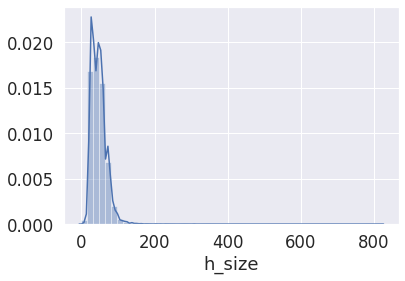

In [94]:
sns.distplot(X['h_size'])

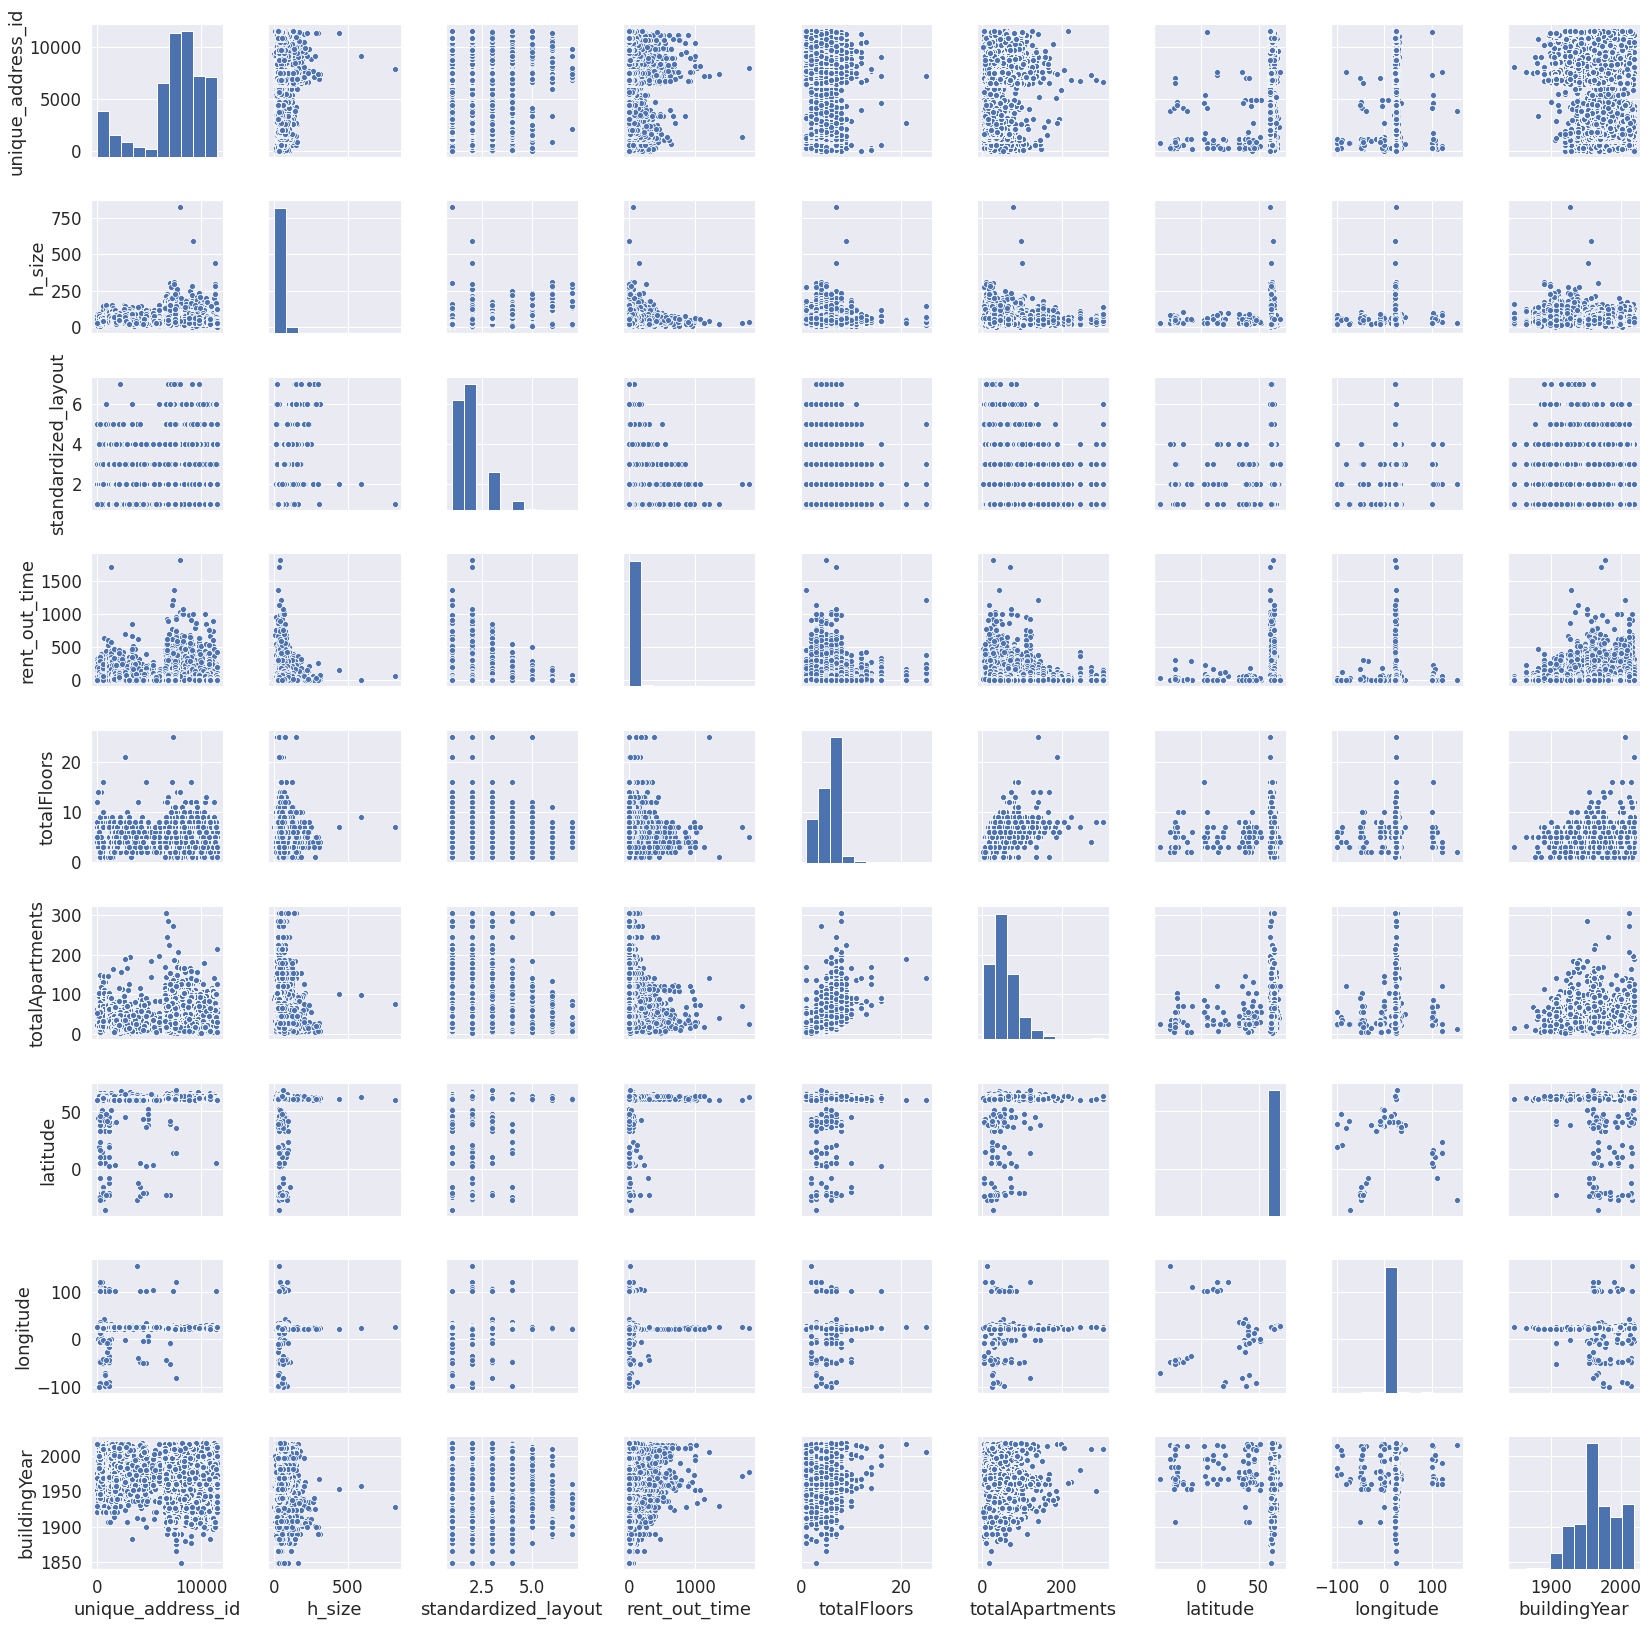

In [95]:
sns.pairplot(X)

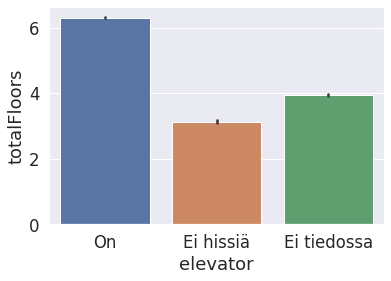

In [96]:
sns.barplot(x='elevator',y='totalFloors',data=X)

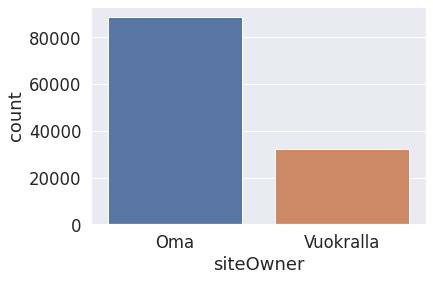

In [97]:
sns.countplot(x='siteOwner',data=X)

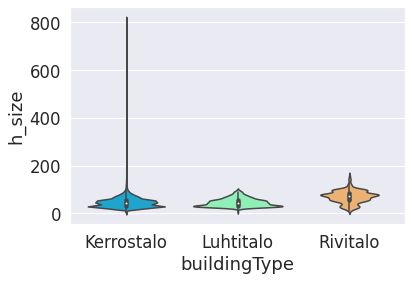

In [98]:
sns.violinplot(x="buildingType", y="h_size", data=X,palette='rainbow')

##### Features from the dataset has object data types convert it into the integer

In [99]:
dummy_cities=pd.get_dummies(X[['buildingType','elevator','siteOwner',
                               'buildingMaterial','heating','heatingSource']])
X=pd.concat([X,dummy_cities],axis=1)



In [100]:
X.drop(['buildingType','elevator','siteOwner',
        'buildingMaterial','heating','heatingSource'],axis = 1,inplace =True)

In [101]:
X.head()

,unique_address_id,h_size,standardized_layout,rent_out_time,totalFloors,totalApartments,latitude,longitude,buildingYear,buildingType_Kerrostalo,buildingType_Luhtitalo,buildingType_Rivitalo,elevator_Ei hissiä,elevator_Ei tiedossa,elevator_On,siteOwner_Oma,siteOwner_Vuokralla,buildingMaterial_Betoni,buildingMaterial_Ei tiedossa,buildingMaterial_Puu,buildingMaterial_Teräs,buildingMaterial_Tiili,heating_Ilmakeskuslämmitys,heating_Suora sähkölämmitys,heating_Uunilämmitys,heating_Vesikeskuslämmitys,heatingSource_Kaasu,heatingSource_Kauko- tai aluelämpö,heatingSource_Kevyt polttoöljy,"heatingSource_Kivihiili, koksi tms.",heatingSource_Maalämpö tms.,heatingSource_Puu,heatingSource_Raskas polttoöljy,heatingSource_Sähkö,heatingSource_Turve
0,288.0,75.0,3.0,13.0,6,27.0,61.49855,23.78102,1995.0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,288.0,51.0,2.0,23.0,6,27.0,61.47266,23.72352,1995.0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,288.0,57.0,2.0,5.0,6,27.0,61.47148,23.75847,1995.0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,288.0,51.0,2.0,8.0,6,27.0,61.45248,23.84164,1995.0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,288.0,57.0,2.0,12.0,6,27.0,61.49996,23.74870,1995.0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [102]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120946 entries, 0 to 125346
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   unique_address_id                    120946 non-null  float64
 1   h_size                               120946 non-null  float64
 2   standardized_layout                  120946 non-null  float64
 3   rent_out_time                        120946 non-null  float64
 4   totalFloors                          120946 non-null  int64  
 5   totalApartments                      120946 non-null  float64
 6   latitude                             120946 non-null  float64
 7   longitude                            120946 non-null  float64
 8   buildingYear                         120946 non-null  float64
 9   buildingType_Kerrostalo              120946 non-null  uint8  
 10  buildingType_Luhtitalo               120946 non-null  uint8  
 11  buildingType_

In [103]:
X.shape

(120946, 35)

In [104]:
y.shape

(120946, 1)

scaler = StandardScaler()


scaler.fit(X)

X = scaler.transform(X)

In [105]:
X.shape

(120946, 35)

In [106]:
y.shape

(120946, 1)

# Feature Engineering

##### Decision tree  is best for extracting the most importance features from the dataset

In [107]:
# Decision Tree Regressor
%time
# Importing the model from scikit learn tree
from sklearn.tree import DecisionTreeRegressor
dfregressor = DecisionTreeRegressor()
modeldt = dfregressor.fit(X,y)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [108]:
importances = list(modeldt.feature_importances_)
importances

[0.18574898062037154,
 0.5587990120564884,
 0.008055073341787395,
 0.021461733045042553,
 0.023545657654222785,
 0.03876844522621672,
 0.02915844074585324,
 0.028303002966322575,
 0.08131303182375985,
 0.00028999958180766816,
 6.446442251564262e-05,
 0.00011368874172893081,
 6.899503029201613e-05,
 0.0026198159077809985,
 0.001427980631499834,
 0.0016068644737505294,
 0.006866914000557932,
 0.0010384247434002995,
 3.307306476364342e-05,
 0.001273259994001277,
 3.587211402214697e-05,
 0.0017709862201842456,
 0.0004378630359098951,
 5.629813565012813e-06,
 1.466811554660488e-06,
 0.00011554849772891669,
 0.00014708843035107932,
 0.005278474594274283,
 0.0006643011849507243,
 0.0006645618612362508,
 0.00016491846211798023,
 7.447045942117694e-06,
 4.399139645055812e-05,
 0.00010494296506689868,
 4.949448157145979e-08]

##### Mapping the features with importance values of the feature in the dataset

In [109]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
feature_importances

[('unique_address_id', 0.19),
 ('h_size', 0.56),
 ('standardized_layout', 0.01),
 ('rent_out_time', 0.02),
 ('totalFloors', 0.02),
 ('totalApartments', 0.04),
 ('latitude', 0.03),
 ('longitude', 0.03),
 ('buildingYear', 0.08),
 ('buildingType_Kerrostalo', 0.0),
 ('buildingType_Luhtitalo', 0.0),
 ('buildingType_Rivitalo', 0.0),
 ('elevator_Ei hissiä', 0.0),
 ('elevator_Ei tiedossa', 0.0),
 ('elevator_On', 0.0),
 ('siteOwner_Oma', 0.0),
 ('siteOwner_Vuokralla', 0.01),
 ('buildingMaterial_Betoni', 0.0),
 ('buildingMaterial_Ei tiedossa', 0.0),
 ('buildingMaterial_Puu', 0.0),
 ('buildingMaterial_Teräs', 0.0),
 ('buildingMaterial_Tiili', 0.0),
 ('heating_Ilmakeskuslämmitys', 0.0),
 ('heating_Suora sähkölämmitys', 0.0),
 ('heating_Uunilämmitys', 0.0),
 ('heating_Vesikeskuslämmitys', 0.0),
 ('heatingSource_Kaasu', 0.0),
 ('heatingSource_Kauko- tai aluelämpö', 0.01),
 ('heatingSource_Kevyt polttoöljy', 0.0),
 ('heatingSource_Kivihiili, koksi tms.', 0.0),
 ('heatingSource_Maalämpö tms.', 0.0),
 

##### Sort the feature importances by most important first

In [110]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('h_size', 0.56),
 ('unique_address_id', 0.19),
 ('buildingYear', 0.08),
 ('totalApartments', 0.04),
 ('latitude', 0.03),
 ('longitude', 0.03),
 ('rent_out_time', 0.02),
 ('totalFloors', 0.02),
 ('standardized_layout', 0.01),
 ('siteOwner_Vuokralla', 0.01),
 ('heatingSource_Kauko- tai aluelämpö', 0.01),
 ('buildingType_Kerrostalo', 0.0),
 ('buildingType_Luhtitalo', 0.0),
 ('buildingType_Rivitalo', 0.0),
 ('elevator_Ei hissiä', 0.0),
 ('elevator_Ei tiedossa', 0.0),
 ('elevator_On', 0.0),
 ('siteOwner_Oma', 0.0),
 ('buildingMaterial_Betoni', 0.0),
 ('buildingMaterial_Ei tiedossa', 0.0),
 ('buildingMaterial_Puu', 0.0),
 ('buildingMaterial_Teräs', 0.0),
 ('buildingMaterial_Tiili', 0.0),
 ('heating_Ilmakeskuslämmitys', 0.0),
 ('heating_Suora sähkölämmitys', 0.0),
 ('heating_Uunilämmitys', 0.0),
 ('heating_Vesikeskuslämmitys', 0.0),
 ('heatingSource_Kaasu', 0.0),
 ('heatingSource_Kevyt polttoöljy', 0.0),
 ('heatingSource_Kivihiili, koksi tms.', 0.0),
 ('heatingSource_Maalämpö tms.', 0.0),
 

##### The most importance features in the master dataset 

In [111]:
for i in range(9):
    print(feature_importances[i][0])


h_size
unique_address_id
buildingYear
totalApartments
latitude
longitude
rent_out_time
totalFloors
standardized_layout


## The most i
##### h_size
##### unique_address_id
##### buildingYear
##### totalApartments
##### latitude
##### longitude
##### rent_out_time
##### totalFloors
##### standardized_layou

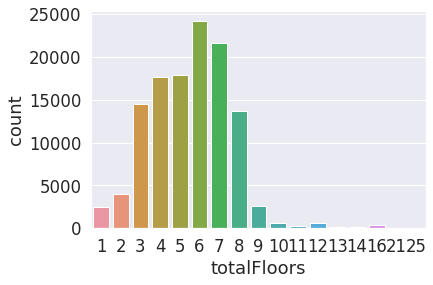

In [112]:
sns.countplot(X.totalFloors)

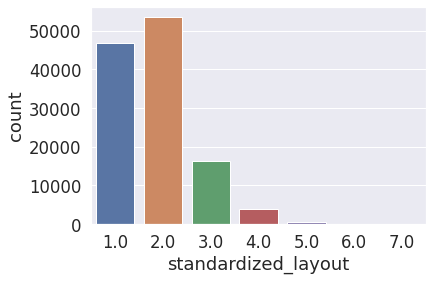

In [113]:
sns.countplot(X.standardized_layout)

In [114]:
X = X[['h_size',
'unique_address_id',
'buildingYear',
'totalApartments',
'latitude',
'longitude',
'rent_out_time',
'totalFloors',
'standardized_layout']]

In [115]:
X.to_csv('X_feature.csv')

In [116]:
Stat_df = pd.concat([X,y],axis=1)

In [117]:
Stat_df.head()

,h_size,unique_address_id,buildingYear,totalApartments,latitude,longitude,rent_out_time,totalFloors,standardized_layout,rent
0,75.0,288.0,1995.0,27.0,61.49855,23.78102,13.0,6,3.0,942
1,51.0,288.0,1995.0,27.0,61.47266,23.72352,23.0,6,2.0,692
2,57.0,288.0,1995.0,27.0,61.47148,23.75847,5.0,6,2.0,764
3,51.0,288.0,1995.0,27.0,61.45248,23.84164,8.0,6,2.0,692
4,57.0,288.0,1995.0,27.0,61.49996,23.74870,12.0,6,2.0,749


In [118]:
Stat_df.to_csv("Stat_df.csv")

In [119]:
X.shape

(120946, 9)

In [120]:
y.shape

(120946, 1)

In [121]:
y.to_csv('y_predictor.csv')

In [122]:
import pandas as pd
df = pd.read_csv('Stat_df.csv')

In [123]:
df.columns

Index(['Unnamed: 0', 'h_size', 'unique_address_id', 'buildingYear',
       'totalApartments', 'latitude', 'longitude', 'rent_out_time',
       'totalFloors', 'standardized_layout', 'rent'],
      dtype='object')

In [124]:
X = df[['h_size', 'unique_address_id', 'buildingYear',
       'totalApartments', 'latitude', 'longitude', 'rent_out_time',
       'totalFloors', 'standardized_layout']]

In [125]:
y = df['rent']

In [126]:
### Splitting the dataset

In [127]:
%time
# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=1)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [128]:
print("X_train :-{} \nX_test :-{}\ny_train :-{}\ny_test :-{}".format(X_train.shape,
                                                             X_test.shape,y_train.shape,y_test.shape))

X_train :-(84662, 9) 
X_test :-(36284, 9)
y_train :-(84662,)
y_test :-(36284,)


# we are going to scale to data

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

'max_depth':[3,5],
              'n_estimators':[10,100],
              'max_features':randint(1,3),
               'criterion':["mae","mse"],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,3),

In [129]:
%time
# Importing the RF model from scikit learn ensemble 
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
regressor.fit(X,y)




CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

# GridSEarch parameter
%time
# Importing the RF model from scikit learn ensemble 
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 200,
 min_samples_split = 5,
 max_features = 'sqrt',
 max_depth = 45)
model = regressor.fit(X,y)





In [130]:
y_predtra = regressor.predict(X_train)

print('r2 value                      : ', metrics.r2_score(y_train, y_predtra)*100)

r2 value                      :  99.99596321355284


In [131]:
# Predicting the values on independent variables testing dataset
y_pred = regressor.predict(X_test)


In [132]:
print("X_train :-{} \nX_test :-{}\ny_train :-{}\ny_test :-{}".format(X_train.shape,
                                                             X_test.shape,y_train.shape,y_test.shape))

X_train :-(84662, 9) 
X_test :-(36284, 9)
y_train :-(84662,)
y_test :-(36284,)


# With Test dataset the Accuracy

In [133]:
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2 value                : ', metrics.r2_score(y_test, y_pred)*100)

Mean Abs Error   MAE    :  0.08990680005879557
Mean Sq  Error MSE      :  9.61811166591641
Root Mean Sq Error RMSE :  3.1013080572423646
r2 value                :  99.99099386846096


# With Train dataset the Accuracy

In [134]:
y_predtra = regressor.predict(X_train)

print('r2 value                      : ', metrics.r2_score(y_train, y_predtra)*100)

r2 value                      :  99.99596321355284


In [135]:
y_pred.shape

(36284,)

In [136]:
# Cross validation score of 10 Kfolds
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator =regressor,X=X_train,y=y_train,cv=15)
accuracy

array([0.91309079, 0.91612668, 0.91719781, 0.90161142, 0.86528544,
       0.88901415, 0.91073769, 0.92954623, 0.91120048, 0.91935296,
       0.9076221 , 0.92398529, 0.90758286, 0.91390306, 0.91592167])

In [137]:
ACC = []
for i in range(14):
    ACC.append(accuracy[i])

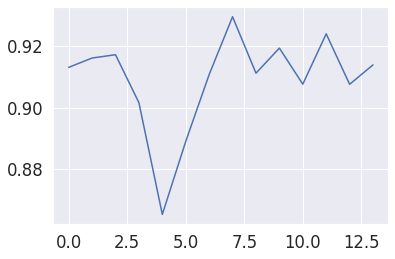

In [138]:

sns.lineplot(x = range(14),y =ACC,markers=True, dashes=True)

In [139]:
print('The mean accuracy for 10 Kfold :',accuracy.mean())

The mean accuracy for 10 Kfold : 0.9094785761714923


In [140]:
print("The standard deviation of the DT model :",accuracy.std())

The standard deviation of the DT model : 0.014908362202234642


In [141]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import tree
from sklearn import ensemble

# Import train_test_split function
from sklearn.model_selection import train_test_split

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [143]:
model =RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# Create adaboost classifer object
abc =AdaBoostRegressor(base_estimator=model,
                        n_estimators=10)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Sq  log Error RMSLE : ', np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))*1000)
print('r2 value                : ', metrics.r2_score(y_test, y_pred)*100)

Mean Abs Error   MAE    :  54.77226305321108
Mean Sq  Error MSE      :  9257.309875638326
Root Mean Sq Error RMSE :  96.21491503731802
Root Mean Sq  log Error RMSLE :  99.22483475258126
r2 value                :  91.33171319552883


# XGBoost Regressor

In [144]:
%time
# Importing the XGBoost model from scikit learn ensemble 
from xgboost import XGBRegressor
classifier = XGBRegressor(n_estimators=1000)
modelxg = classifier.fit(X,y)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
[12:53:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


y_pred1 = classifier.predict(X_train)

print('r2 value                : ', metrics.r2_score(y_train, y_pred1)*100)

In [145]:
# Predicting the values on independent variables testing dataset
y_pred1 = modelxg.predict(X_test)

In [146]:
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('Root Mean Sq  log Error RMSLE : ', np.sqrt(metrics.mean_squared_log_error(y_test, y_pred1))*1000)
print('r2 value                : ', metrics.r2_score(y_test, y_pred1)*100)

Mean Abs Error   MAE    :  76.21717158920933
Mean Sq  Error MSE      :  12379.307901549457
Root Mean Sq Error RMSE :  111.26233819918336
Root Mean Sq  log Error RMSLE :  125.1155644606187
r2 value                :  88.40836130873413


In [147]:
# Cross validation score of 10 Kfolds
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator =dfregressor,X=X_train,y=y_train,cv=10)
accuracy

array([0.8269068 , 0.8508629 , 0.80432088, 0.81838108, 0.83415569,
       0.83773758, 0.84451401, 0.83571353, 0.82609426, 0.82805185])

In [148]:
print('The mean accuracy for 10 Kfold :',accuracy.mean())

The mean accuracy for 10 Kfold : 0.8306738578171384


In [149]:
print("The standard deviation of the DT model :",accuracy.std())

The standard deviation of the DT model : 0.012546692365011929


In [150]:
# GridSearch and RandomisedSearchCV

In [151]:
#fit decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
#fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [152]:
#fit regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [153]:
models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree)]
from sklearn.metrics import mean_squared_error
for i, model in models:    
    predictions = model.predict(X_train)
    MSE = mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)

RMSE of lin_reg = 226.11
RMSE of random forest = 37.66
RMSE of decision tree = 1.83


In [154]:
from sklearn.model_selection import cross_validate
models= [('lin_reg', lin_reg), ('forest', forest), ('dt', tree)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

#for each model I want to test three different scoring metrics. Therefore, results[0] will be lin_reg x MSE, 
# results[1] lin_reg x MSE and so on until results [8], where we stored dt x r2

results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, X_train, y_train, scoring=i, cv=10, return_train_score=True)
        results.append(scores)

In [155]:
#this is an example of the stored results
results[8]

{'fit_time': array([0.68443203, 0.69090939, 0.68596268, 0.68360925, 0.68191195,
        0.6741848 , 0.6840179 , 0.68222857, 0.67310214, 0.68159699]),
 'score_time': array([0.00587344, 0.00603676, 0.00607848, 0.00591445, 0.00587821,
        0.00595307, 0.00598764, 0.00591993, 0.00682378, 0.00611258]),
 'test_score': array([0.82888001, 0.84262755, 0.78421598, 0.82009511, 0.83571299,
        0.82186529, 0.8419974 , 0.8497585 , 0.82685361, 0.82762743]),
 'train_score': array([0.99996616, 0.99997074, 0.99996827, 0.99998318, 0.99997399,
        0.99996546, 0.99997692, 0.99997348, 0.99996716, 0.99997108])}

In [156]:
#THIS IS FOR Linear regression
#if you change signa and square the Mean Square Error you get the RMSE, which is the most common metric to accuracy
LR_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
LR_RMSE_std= results[0]['test_score'].std()
# note that also here I changed the sign, as the result is originally a negative number for ease of computation
LR_MAE_mean = -results[1]['test_score'].mean()
LR_MAE_std= results[1]['test_score'].std()
LR_r2_mean = results[2]['test_score'].mean()
LR_r2_std = results[2]['test_score'].std()

#THIS IS FOR RF
RF_RMSE_mean = np.sqrt(-results[3]['test_score'].mean())
RF_RMSE_std= results[3]['test_score'].std()
RF_MAE_mean = -results[4]['test_score'].mean()
RF_MAE_std= results[4]['test_score'].std()
RF_r2_mean = results[5]['test_score'].mean()
RF_r2_std = results[5]['test_score'].std()

#THIS IS FOR DT
DT_RMSE_mean = np.sqrt(-results[6]['test_score'].mean())
DT_RMSE_std= results[6]['test_score'].std()
DT_MAE_mean = -results[7]['test_score'].mean()
DT_MAE_std= results[7]['test_score'].std()
DT_r2_mean = results[8]['test_score'].mean()
DT_r2_std = results[8]['test_score'].std()

In [157]:
modelDF = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest', 'Decision Trees'],
    'RMSE_mean'    : [LR_RMSE_mean, RF_RMSE_mean, DT_RMSE_mean],
    'RMSE_std'    : [LR_RMSE_std, RF_RMSE_std, DT_RMSE_std],
    'MAE_mean'   : [LR_MAE_mean, RF_MAE_mean, DT_MAE_mean],
    'MAE_std'   : [LR_MAE_std, RF_MAE_std, DT_MAE_std],
    'r2_mean'      : [LR_r2_mean, RF_r2_mean, DT_r2_mean],
    'r2_std'      : [LR_r2_std, RF_r2_std, DT_r2_std],
    }, columns = ['Model', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std', 'r2_mean', 'r2_std'])

modelDF.sort_values(by='r2_mean', ascending=False)

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,r2_mean,r2_std
1,Random Forest,101.058270,1210.737071,57.300524,1.142675,0.904109,0.010936
2,Decision Trees,134.760510,1646.598127,73.720636,1.154037,0.827963,0.017211
0,Linear Regression,226.485329,2492.773157,167.623248,1.225947,0.516615,0.034888


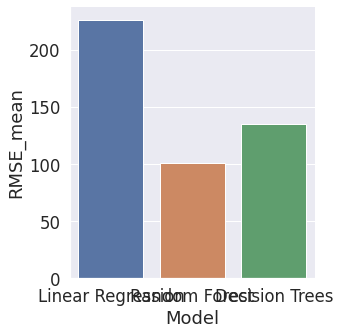

In [158]:
sns.factorplot(x= 'Model', y= 'RMSE_mean', data= modelDF, kind='bar')

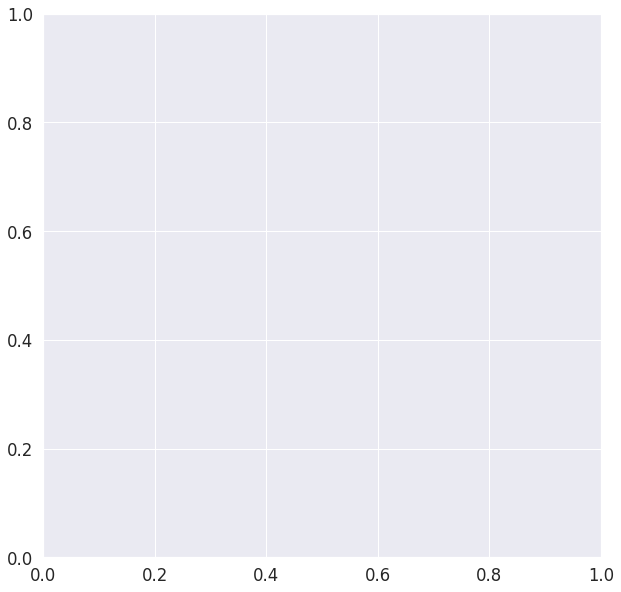

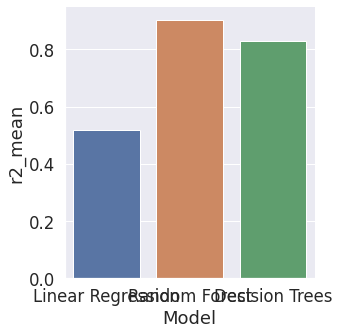

In [159]:
fig, ax = plt.subplots(figsize=(10,10))
sns.factorplot(x= 'Model', y= 'r2_mean', data= modelDF, kind='bar')
plt.show()

In [160]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [161]:
#now let's how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

142.74664661776708 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
140.56258510863333 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
nan {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
nan {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
104.00636028914936 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
99.97666619991443 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
nan {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
nan {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
103.90384435091936 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
99.78011326044695 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
nan {'bootstrap': True, 'max_depth': None, 'max_features': 10, 'n_estimators': 10}
nan {'bootstrap': Tru

In [162]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(X_train)
grid_best = grid_best.reshape(84662,1)
errors = abs(grid_best - y_train)

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

In [ ]:
#RMSE
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

# RandomisedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
#now let's how the RMSE changes for each parameter configuration
cvres2 = rf_random.return_train_score
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
# best random model 
rf_random.best_estimator_

In [ ]:
# best combination of parameters of random search
rf_random.best_params_

In [ ]:
rf_random.best_estimator_

In [ ]:
# Performance metrics (MAPE)
random_best= rf_random.best_estimator_.predict(X_train)
random_best = random_best.reshape(84662,1)
errors = abs(random_best - y_train)

# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

In [ ]:
#this is the RMSE
final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))